# NOTES FOR PAPER:
1. separate the different types of beliefs into different sections:
* priority, technical, etc.
2. Make section of "statistically significant disagreements" and "statistically significant agreements" between groups: ai safety researchers are the outliers here

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Create lists of pre- and post-reading question columns
pre_questions = [f'Q6_{i}' for i in range(1, 10)]
post_questions = [f'Q16_{i}' for i in range(1, 10)]



In [5]:
df[pre_questions].value_counts()

Q6_1                        Q6_2                        Q6_3                        Q6_4                        Q6_5                        Q6_6                        Q6_7                        Q6_8                        Q6_9                      
Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree              Somewhat agree                3
Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree  Neither agree nor disagree    2
Somewhat disagree           Neither agree nor disagree  Somewhat disagree           Neither agree nor disagree  Somewhat disagree           Somewhat disagree           Neither agree nor disagree  strongly disagree           Somewhat agre

In [6]:
# change the likert scale to numerical
swaps = {
    "strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5,
}

df[pre_questions] = df[pre_questions].replace(swaps)
df[post_questions] = df[post_questions].replace(swaps)

In [7]:

# Calculate mean agreement scores for pre- and post-reading
pre_means = df[pre_questions].mean()
post_means = df[post_questions].mean()

In [8]:

# Calculate group means for pre- and post-reading
groups = df['Q1'].unique()
pre_group_means = df.groupby('Q1')[pre_questions].mean()
post_group_means = df.groupby('Q1')[post_questions].mean()


In [9]:
pre_group_means

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9
Q1,,,,,,,,,
AI Safety Researcher,1.857143,4.285714,3.571429,2.571429,1.571429,1.285714,3.714286,2.142857,4.714286
Academic,3.178571,3.290909,2.400000,3.090909,3.272727,2.927273,3.345455,2.290909,3.945455
Industry,2.928571,3.214286,2.285714,3.500000,3.571429,2.714286,3.357143,1.857143,3.714286
Other,2.500000,3.000000,3.166667,2.333333,2.833333,3.200000,3.500000,2.000000,3.666667


In [10]:
post_group_means

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9
Q1,,,,,,,,,
AI Safety Researcher,1.857143,4.142857,3.714286,2.285714,1.428571,1.285714,3.714286,2.142857,4.571429
Academic,3.093023,3.095238,2.380952,3.190476,3.428571,3.023810,3.166667,2.238095,3.976190
Industry,3.125000,2.875000,2.500000,3.250000,3.500000,2.125000,2.875000,2.000000,3.875000
Other,2.600000,3.400000,3.000000,2.800000,2.400000,1.750000,3.750000,1.500000,4.250000


In [11]:
[f'S{i}' for i in range(1, 10)]

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']

In [12]:
pre_means

Q6_1    2.976190
Q6_2    3.337349
Q6_3    2.542169
Q6_4    3.060241
Q6_5    3.132530
Q6_6    2.756098
Q6_7    3.385542
Q6_8    2.168675
Q6_9    3.915663
dtype: float64

In [13]:
post_group_means

,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9
Q1,,,,,,,,,
AI Safety Researcher,1.857143,4.142857,3.714286,2.285714,1.428571,1.285714,3.714286,2.142857,4.571429
Academic,3.093023,3.095238,2.380952,3.190476,3.428571,3.023810,3.166667,2.238095,3.976190
Industry,3.125000,2.875000,2.500000,3.250000,3.500000,2.125000,2.875000,2.000000,3.875000
Other,2.600000,3.400000,3.000000,2.800000,2.400000,1.750000,3.750000,1.500000,4.250000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming pre_means and post_group_means are already defined as shown in the images

# Set up the plot style
# plt.style.use('seaborn')
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['xtick.labelsize'] = 'x-small'
# plt.rcParams['ytick.labelsize'] = 'x-small'



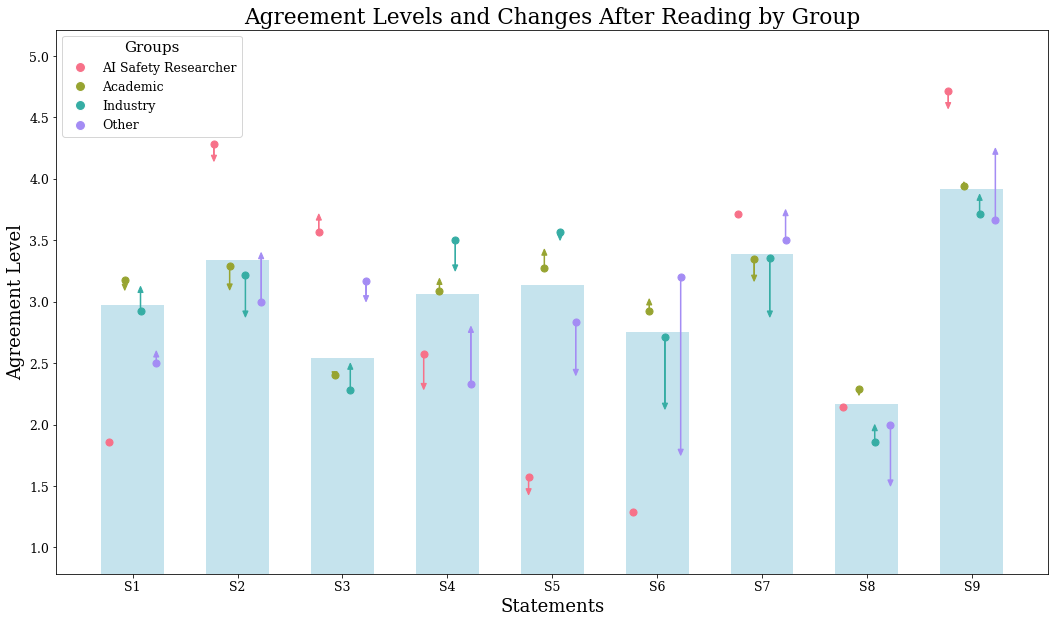

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(15, 9))

x = range(1, 10)
bar_width = 0.6
bars = ax.bar(x, pre_means, color='lightblue', alpha=0.7, width=bar_width)

# Define color palette explicitly
groups = ['AI Safety Researcher', 'Academic', 'Industry', 'Other']
colors = sns.color_palette("husl", n_colors=len(groups))

# Calculate offsets for spreading out the points
num_groups = len(groups)
offsets = np.linspace(-bar_width/2 + bar_width/(num_groups*2), 
                      bar_width/2 - bar_width/(num_groups*2), 
                      num_groups)

# Plot group means as scatter points with arrows
for i, group in enumerate(groups):
    pre_group_means_row = pre_group_means.loc[group, ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']]
    post_group_means_row = post_group_means.loc[group, ['Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9']]
    
    for j in range(9):
        x_pos = x[j] + offsets[i]
        ax.scatter(x_pos, pre_group_means_row[j], color=colors[i], s=50, zorder=3)
        dx = 0  # No horizontal change
        dy = post_group_means_row[j] - pre_group_means_row[j]
        ax.arrow(x_pos, pre_group_means_row[j], dx, dy, color=colors[i], 
                 width=0.005, head_width=0.05, head_length=0.05, 
                 zorder=2, length_includes_head=True)

# Customize the plot
ax.set_ylabel('Agreement Level', fontsize='medium')
ax.set_xlabel('Statements', fontsize='medium')
ax.set_title('Agreement Levels and Changes After Reading by Group', fontsize='large')
ax.set_xticks(x)
ax.set_xticklabels([f'S{i}' for i in range(1, 10)])

# Create legend with correct colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=group, 
                   markerfacecolor=color, markersize=10) 
                   for group, color in zip(groups, colors)]
ax.legend(handles=legend_elements, title='Groups', fontsize='x-small', title_fontsize='small')

# Set y-axis limits to accommodate arrows
y_min = min(pre_group_means.min().min(), post_group_means.min().min()) - 0.5
y_max = max(pre_group_means.max().max(), post_group_means.max().max()) + 0.5
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

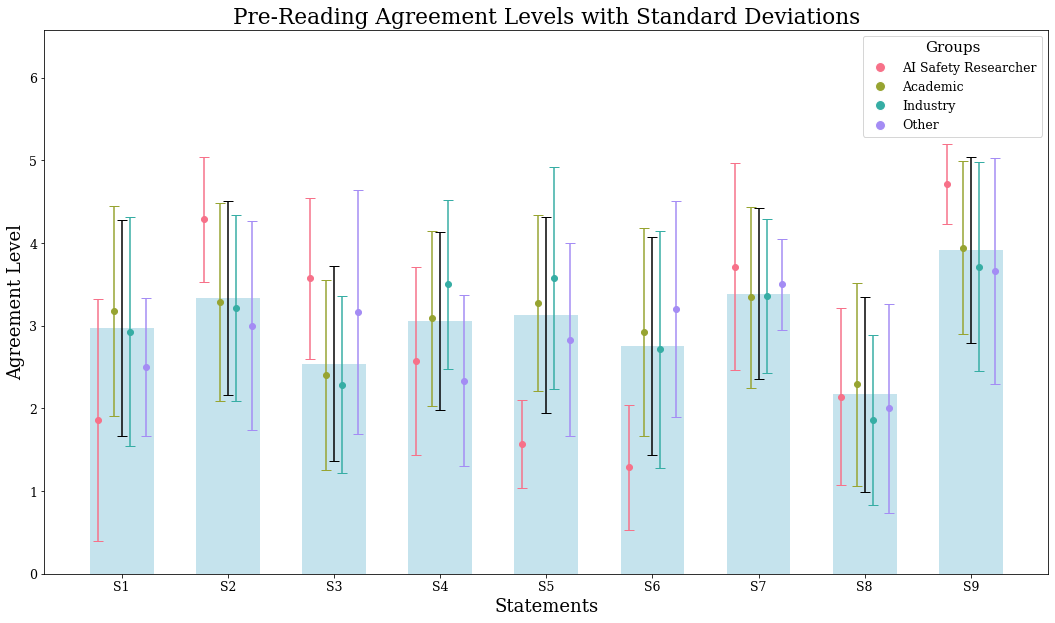

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(15, 9))

x = range(1, 10)
bar_width = 0.6

# Calculate total means and standard deviations
total_means = pre_means
total_stds = df[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']].std()

# Plot total means with error bars
bars = ax.bar(x, total_means, color='lightblue', alpha=0.7, width=bar_width, yerr=total_stds, capsize=5, zorder=1)

# Define color palette explicitly
groups = ['AI Safety Researcher', 'Academic', 'Industry', 'Other']
colors = sns.color_palette("husl", n_colors=len(groups))

# Calculate offsets for spreading out the points
num_groups = len(groups)
offsets = np.linspace(-bar_width/2 + bar_width/(num_groups*2), 
                      bar_width/2 - bar_width/(num_groups*2), 
                      num_groups)

# Plot group means as scatter points with error bars
for i, group in enumerate(groups):
    pre_group_means_row = pre_group_means.loc[group, ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']]
    
    # Calculate standard deviations for this group
    group_stds = df[df['Q1'] == group][['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9']].std()
    
    for j in range(9):
        x_pos = x[j] + offsets[i]
        ax.errorbar(x_pos, pre_group_means_row[j], yerr=group_stds[j], 
                    fmt='o', color=colors[i], capsize=5, capthick=1, zorder=2)

# Customize the plot
ax.set_ylabel('Agreement Level', fontsize='medium')
ax.set_xlabel('Statements', fontsize='medium')
ax.set_title('Pre-Reading Agreement Levels with Standard Deviations', fontsize='large')
ax.set_xticks(x)
ax.set_xticklabels([f'S{i}' for i in range(1, 10)])

# Create legend with correct colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=group, 
                   markerfacecolor=color, markersize=10) 
                   for group, color in zip(groups, colors)]
ax.legend(handles=legend_elements, title='Groups', fontsize='x-small', title_fontsize='small')

# Set y-axis limits to accommodate error bars
y_min = 0  # Assuming agreement levels start at 0
y_max = max((pre_group_means + group_stds).max().max(), (total_means + total_stds).max()) + 0.5
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

In [17]:
pre_means

Q6_1    2.976190
Q6_2    3.337349
Q6_3    2.542169
Q6_4    3.060241
Q6_5    3.132530
Q6_6    2.756098
Q6_7    3.385542
Q6_8    2.168675
Q6_9    3.915663
dtype: float64

In [18]:
pre_group_means

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9
Q1,,,,,,,,,
AI Safety Researcher,1.857143,4.285714,3.571429,2.571429,1.571429,1.285714,3.714286,2.142857,4.714286
Academic,3.178571,3.290909,2.400000,3.090909,3.272727,2.927273,3.345455,2.290909,3.945455
Industry,2.928571,3.214286,2.285714,3.500000,3.571429,2.714286,3.357143,1.857143,3.714286
Other,2.500000,3.000000,3.166667,2.333333,2.833333,3.200000,3.500000,2.000000,3.666667


In [19]:
print(pre_means)

# print just the VALUES in the pre_means
print(pre_means.values)

Q6_1    2.976190
Q6_2    3.337349
Q6_3    2.542169
Q6_4    3.060241
Q6_5    3.132530
Q6_6    2.756098
Q6_7    3.385542
Q6_8    2.168675
Q6_9    3.915663
dtype: float64
[2.97619048 3.3373494  2.54216867 3.06024096 3.13253012 2.75609756
 3.38554217 2.1686747  3.91566265]


In [20]:

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Statement': [f'S{i}' for i in range(1, 10)],
    'Pre_Mean': pre_means.values,
    'Post_Mean': post_means.values
})


In [21]:
plot_data

,Statement,Pre_Mean,Post_Mean
0,S1,2.976190,2.920635
1,S2,3.337349,3.209677
2,S3,2.542169,2.596774
3,S4,3.060241,3.064516
4,S5,3.132530,3.129032
5,S6,2.756098,2.622951
6,S7,3.385542,3.229508
7,S8,2.168675,2.147541
8,S9,3.915663,4.049180


In [22]:

# Calculate the change in agreement
plot_data['Change'] = plot_data['Post_Mean'] - plot_data['Pre_Mean']

In [23]:
plot_data

,Statement,Pre_Mean,Post_Mean,Change
0,S1,2.976190,2.920635,-0.055556
1,S2,3.337349,3.209677,-0.127672
2,S3,2.542169,2.596774,0.054606
3,S4,3.060241,3.064516,0.004275
4,S5,3.132530,3.129032,-0.003498
5,S6,2.756098,2.622951,-0.133147
6,S7,3.385542,3.229508,-0.156034
7,S8,2.168675,2.147541,-0.021134
8,S9,3.915663,4.049180,0.133518
